# NICE: Non Linear Independent Components Estimation 



NICE is a deep learning framework changing high dimensional complex data into non linear independent components. This post summarizes the paper and explains some left out mathematical concepts especially why resulting jacobian of transformation function is unit constant and how to derive it. In addition, pytorch implementation of experimental results are given.

- Paper is [here](https://arxiv.org/abs/1410.8516)
- Original code is [here](https://github.com/fmu2/NICE/)
- Kaggle kernel for implementation of whole experimental result is [here](https://kaggleurl)


## Overview

Given data $x \in \mathcal{X}^{D}$is transformed using vector valued function of $h=f(x)$ which is $f: \mathcal{X}^{D} \to \mathcal{H}^{D} $ and trivially invertible. Distribution of $h$ is assumed to be composed of independent components that can be factorized as follows:

$$ P_{H}~(h) = \prod_{d \in \mathcal{D}}~P_{H_{d}}~(h_{d}) $$

Using change of variables, we obtain following equation

$$ P_{X}~(x) = P_{H}~(f(x)) ~ \left \vert \det \frac{\partial f(x)}{\partial x} \right \vert \tag{1} $$

To decide an $f$ following two conditions should be met to benefit from NICE framework:
1. Determinant of $J(f(x))$ is trivially obtained
2. $f^{-1}$ is also trivially obtained 

As a result, learning criterion of NICE framework is maximizing the following log likelihood:

$$ \log( P_{X}~(x)) = \sum_{d=1}^{\mathcal{D}} \log(P_{H_{d}}~(f_{d}(x))) + \log\left(\left \vert \det \frac{\partial f(x)}{\partial x} \right \vert \right) \tag{2} $$

## Mathematical background

### Jacobians

The result of function compositions can be shown as $ h = f(x) = f_{L} ~ \circ \cdots f_{2} \circ f_{1}(x) $ and let's show that jacobian of function compositions is equal to the matrix multiplication of individual function jacobians which is $ J(h) = \frac{\partial h}{\partial x} = \frac{\partial f_{L}}{\partial f_{L-1}} \cdots \frac{\partial f_{2}}{\partial f_{1}} \frac{\partial f_{1}(x)}{\partial x} $.  we can demonstrate how the procedure works with an example and generalization can be derived building upon it. Functions and their depended variables are as follows:


$$ h_{1} = f_{1}(x_{1}, x_{2}), ~~ h_{3} = f_{3}(h_{1}, h_{2}) $$
$$ h_{2} = f_{2}(x_{1}, x_{2}), ~~ h_{4} = f_{4}(h_{1}, h_{2}) $$
$$ h = (h_{3}, h_{4}) $$

So jacobian of $h$ is

$$ J(h) = \frac{ \partial (h)}{\partial (x_{1}, x_{2})} = \frac{ \partial (h_{3},h_{4})}{\partial (x_{1}, x_{2})} = \begin{bmatrix}  \frac{ \partial h_{3}}{\partial x_{1} } & \frac{ \partial h_{3}}{\partial x_{2} }\\ \frac{ \partial h_{4}}{\partial x_{1} } & \frac{ \partial h_{4}}{\partial x_{2} } \end{bmatrix} \tag{3} $$
<img src="der_depend.jpg" width="700">

**Figure 1**: *Graphical description of how chain rule works in multivariable functions*

Figure 1 shows how to obtain partial derivative of a multivariable function with dependency graph of each function. If we plug results into (3), we end up with the following equation:



$$ = \begin{bmatrix} \frac{ \partial h_{3}}{\partial h_{1}}   \frac{ \partial h_{1}}{\partial x_{1}}  +  \frac{ \partial h_{3}}{\partial h_{2}}   \frac{ \partial h_{2}}{\partial x_{1}} & \frac{ \partial h_{3}}{\partial h_{1}}   \frac{ \partial h_{1}}{\partial x_{2}}  +  \frac{ \partial h_{3}}{\partial h_{2}}   \frac{ \partial h_{2}}{\partial x_{2}} \\ \frac{ \partial h_{4}}{\partial h_{1}}   \frac{ \partial h_{1}}{\partial x_{1}}  +  \frac{ \partial h_{4}}{\partial h_{2}}   \frac{ \partial h_{2}}{\partial x_{1}} & \frac{ \partial h_{4}}{\partial h_{1}}   \frac{ \partial h_{1}}{\partial x_{2}}  +  \frac{ \partial h_{4}}{\partial h_{2}}   \frac{ \partial h_{2}}{\partial x_{2}} \end{bmatrix}$$

We can decompose this expression using matrix multiplication such that

$$ J(h) = \begin{bmatrix}  \frac{ \partial h_{3}}{\partial h_{1} } & \frac{ \partial h_{3}}{\partial h_{2} }\\ \frac{ \partial h_{4}}{\partial h_{1} } & \frac{ \partial h_{4}}{\partial h_{2} } \end{bmatrix} ~ \begin{bmatrix}  \frac{ \partial h_{1}}{\partial x_{1} } & \frac{ \partial h_{1}}{\partial x_{2} }\\ \frac{ \partial h_{2}}{\partial x_{1} } & \frac{ \partial h_{2}}{\partial x_{2} } \end{bmatrix} $$

$$ J(h) = \frac{ \partial (h_{3},h_{4}) }{\partial (h_{1}, h_{2})} \frac{ \partial (h_{1},h_{2}) }{\partial (x_{1}, x_{2})} \tag{4} $$

and finally since we are using the determinant of jacobian in (1), we can use $ \det(AB) = \det(A) \det(B)$   identity to find the result. 

### Coupling

Furthermore, we show why additive coupling generates unit constant determinant of jacobian by defining couping layers of transformation function as follows:

$$ h_{1} =x_{1}$$
$$ h_{2} = x_{2} + m_{1}(x_{1}) $$
$$ h_{3} = h_{1} + m_{2}(x_{2}) $$
$$ h_{4} = h_{2} $$
$$ h = ( h_{3}, h_{4}) $$


$$ J(h) = \begin{bmatrix}  \frac{ \partial h_{3}}{\partial h_{1} } & \frac{ \partial h_{3}}{\partial h_{2} }\\ \frac{ \partial h_{4}}{\partial h_{1} } & \frac{ \partial h_{4}}{\partial h_{2} } \end{bmatrix} ~ \begin{bmatrix}  \frac{ \partial h_{1}}{\partial x_{1} } & \frac{ \partial h_{1}}{\partial x_{2} }\\ \frac{ \partial h_{2}}{\partial x_{1} } & \frac{ \partial h_{2}}{\partial x_{2} } \end{bmatrix} = \begin{bmatrix} I_{d} & \frac{\partial m_{2}~(x_{2})}{ \partial h_{2}} \\ 0 & I_{d} \end{bmatrix} \begin{bmatrix} I_{d} & 0 \\ \frac{\partial m_{1}~(x_{1})}{\partial x_{1}}  & I_{d} \end{bmatrix}$$

Another fact is that determinant of triangular matrices is the multiplication of their diagonal elements and in this case the result is 1 due to identity matrices.

## Whole library

Coding of library is pretty self explanatory and is added for exploratory purposes. Otherwise, library can be downloaded and imported as usual. 

In [2]:
"""Utility classes for NICE.
"""

import torch
import torch.nn as nn

"""Additive coupling layer.
"""
class Coupling(nn.Module):
    def __init__(self, in_out_dim, mid_dim, hidden, mask_config):
        """Initialize a coupling layer.

        Args:
            in_out_dim: input/output dimensions.
            mid_dim: number of units in a hidden layer.
            hidden: number of hidden layers.
            mask_config: 1 if transform odd units, 0 if transform even units.
        """
        super(Coupling, self).__init__()
        self.mask_config = mask_config

        self.in_block = nn.Sequential(
            nn.Linear(in_out_dim//2, mid_dim),
            nn.ReLU())
        self.mid_block = nn.ModuleList([
            nn.Sequential(
                nn.Linear(mid_dim, mid_dim),
                nn.ReLU()) for _ in range(hidden - 1)])
        self.out_block = nn.Linear(mid_dim, in_out_dim//2)

    def forward(self, x, reverse=False):
        """Forward pass.

        Args:
            x: input tensor.
            reverse: True in inference mode, False in sampling mode.
        Returns:
            transformed tensor.
        """
        [B, W] = list(x.size())
        x = x.reshape((B, W//2, 2))
        if self.mask_config:
            on, off = x[:, :, 0], x[:, :, 1]
        else:
            off, on = x[:, :, 0], x[:, :, 1]

        off_ = self.in_block(off)
        for i in range(len(self.mid_block)):
            off_ = self.mid_block[i](off_)
        shift = self.out_block(off_)
        if reverse:
            on = on - shift
        else:
            on = on + shift

        if self.mask_config:
            x = torch.stack((on, off), dim=2)
        else:
            x = torch.stack((off, on), dim=2)
        return x.reshape((B, W))

"""Log-scaling layer.
"""
class Scaling(nn.Module):
    def __init__(self, dim):
        """Initialize a (log-)scaling layer.

        Args:
            dim: input/output dimensions.
        """
        super(Scaling, self).__init__()
        self.scale = nn.Parameter(
            torch.zeros((1, dim)), requires_grad=True)

    def forward(self, x, reverse=False):
        """Forward pass.

        Args:
            x: input tensor.
            reverse: True in inference mode, False in sampling mode.
        Returns:
            transformed tensor and log-determinant of Jacobian.
        """
        log_det_J = torch.sum(self.scale)
        if reverse:
            x = x * torch.exp(-self.scale)
        else:
            x = x * torch.exp(self.scale)
        return x, log_det_J

"""NICE main model.
"""
class NICE(nn.Module):
    def __init__(self, prior, coupling, 
        in_out_dim, mid_dim, hidden, mask_config):
        """Initialize a NICE.

        Args:
            prior: prior distribution over latent space Z.
            coupling: number of coupling layers.
            in_out_dim: input/output dimensions.
            mid_dim: number of units in a hidden layer.
            hidden: number of hidden layers.
            mask_config: 1 if transform odd units, 0 if transform even units.
        """
        super(NICE, self).__init__()
        self.prior = prior
        self.in_out_dim = in_out_dim

        self.coupling = nn.ModuleList([
            Coupling(in_out_dim=in_out_dim, 
                     mid_dim=mid_dim, 
                     hidden=hidden, 
                     mask_config=(mask_config+i)%2) \
            for i in range(coupling)])
        self.scaling = Scaling(in_out_dim)

    def g(self, z):
        """Transformation g: Z -> X (inverse of f).

        Args:
            z: tensor in latent space Z.
        Returns:
            transformed tensor in data space X.
        """
        x, _ = self.scaling(z, reverse=True)
        for i in reversed(range(len(self.coupling))):
            x = self.coupling[i](x, reverse=True)
        return x

    def f(self, x):
        """Transformation f: X -> Z (inverse of g).

        Args:
            x: tensor in data space X.
        Returns:
            transformed tensor in latent space Z.
        """
        for i in range(len(self.coupling)):
            x = self.coupling[i](x)
        return self.scaling(x)

    def log_prob(self, x):
        """Computes data log-likelihood.

        (See Section 3.3 in the NICE paper.)

        Args:
            x: input minibatch.
        Returns:
            log-likelihood of input.
        """
        z, log_det_J = self.f(x)
        log_ll = torch.sum(self.prior.log_prob(z), dim=1)
        return log_ll + log_det_J

    def sample(self, size):
        """Generates samples.

        Args:
            size: number of samples to generate.
        Returns:
            samples from the data space X.
        """
        if torch.cuda.is_available():
            z = self.prior.sample((size, self.in_out_dim)).cuda()
        else:
            z = self.prior.sample((size, self.in_out_dim)).cpu()        
        
        return self.g(z)

    def forward(self, x):
        """Forward pass.

        Args:
            x: input minibatch.
        Returns:
            log-likelihood of input.
        """
        return self.log_prob(x)
    
"""Utility functions for NICE.
"""

import torch
import torch.nn.functional as F

def dequantize(x, dataset):
    '''Dequantize data.

    Add noise sampled from Uniform(0, 1) to each pixel (in [0, 255]).

    Args:
        x: input tensor.
        reverse: True in inference mode, False in training mode.
    Returns:
        dequantized data.
    '''
    noise = torch.distributions.Uniform(0., 1.).sample(x.size())
    return (x * 255. + noise) / 256.

def prepare_data(x, dataset, zca=None, mean=None, reverse=False):
    """Prepares data for NICE.

    In training mode, flatten and dequantize the input.
    In inference mode, reshape tensor into image size.

    Args:
        x: input minibatch.
        dataset: name of dataset.
        zca: ZCA whitening transformation matrix.
        mean: center of original dataset.
        reverse: True if in inference mode, False if in training mode.
    Returns:
        transformed data.
    """
    if reverse:
        assert len(list(x.size())) == 2
        [B, W] = list(x.size())

        if dataset in ['mnist', 'fashion-mnist']:
            assert W == 1 * 28 * 28
            x += mean
            x = x.reshape((B, 1, 28, 28))
        elif dataset in ['svhn', 'cifar10']:
            assert W == 3 * 32 * 32
            x = torch.matmul(x, zca.inverse()) + mean
            x = x.reshape((B, 3, 32, 32))
    else:
        assert len(list(x.size())) == 4
        [B, C, H, W] = list(x.size())

        if dataset in ['mnist', 'fashion-mnist']:
            assert [C, H, W] == [1, 28, 28]
        elif dataset in ['svhn', 'cifar10']:
            assert [C, H, W] == [3, 32, 32]

        x = dequantize(x, dataset)
        x = x.reshape((B, C*H*W))

        if dataset in ['mnist', 'fashion-mnist']:
            x -= mean
        elif dataset in ['svhn', 'cifar10']:
            x = torch.matmul((x - mean), zca)
    return x

"""Standard logistic distribution.
"""
class StandardLogistic(torch.distributions.Distribution):
    def __init__(self):
        super(StandardLogistic, self).__init__()

    def log_prob(self, x):
        """Computes data log-likelihood.

        Args:
            x: input tensor.
        Returns:
            log-likelihood.
        """
        return -(F.softplus(x) + F.softplus(-x))

    def sample(self, size):
        """Samples from the distribution.

        Args:
            size: number of samples to generate.
        Returns:
            samples.
        """
        if torch.cuda.is_available():
            z = torch.distributions.Uniform(0., 1.).sample(size).cuda()
        else:
            z = torch.distributions.Uniform(0., 1.).sample(size).cpu()  
        
        return torch.log(z) - torch.log(1. - z)


## Train example

- 4 different data sets are included: `"mnist"`,`"fashion-mnist"`,`"svhn"` and `"cifar10"`.
- If `save_model_and_load = True`, then next training session starts with previous information of neural network.
- If gpu support is not present, it really takes a long time to train, so kaggle kernel might be more preferable.

iter 10: loss = 916.781 bits/dim = 9.687


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 20: loss = 454.292 bits/dim = 8.836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 30: loss = 300.312 bits/dim = 8.553


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 40: loss = 223.267 bits/dim = 8.411


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 50: loss = 177.043 bits/dim = 8.326


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 60: loss = 146.198 bits/dim = 8.269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 70: loss = 124.223 bits/dim = 8.229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 80: loss = 107.713 bits/dim = 8.198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 90: loss = 94.855 bits/dim = 8.175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter 100: loss = 84.622 bits/dim = 8.156


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Finished training!
Checkpoint Saved


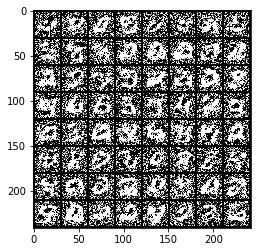

In [12]:
%matplotlib inline
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt
import os

dataset_choice = "mnist" # Other possible parameters: "fashion-mnist", "svhn", "cifar10".
max_iter = 100 # Around 4000 pictures start to have discernible shapes.
save_model_and_load = True # If "True" trained model is saved and loades in every run. 



def main(args):
    
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
    else:
        device = torch.device("cpu")
            
    # model hyperparameters
    dataset = args.dataset
    batch_size = args.batch_size
    latent = args.latent
    max_iter = args.max_iter
    sample_size = args.sample_size
    coupling = 4
    mask_config = 1.

    # optimization hyperparameters
    lr = args.lr
    momentum = args.momentum
    decay = args.decay

    zca = None
    mean = None
    
    if dataset == 'mnist':
        
        mean = torch.load('./NICE/statistics/mnist_mean.pt')
        (full_dim, mid_dim, hidden) = (1 * 28 * 28, 1000, 5)
        transform = torchvision.transforms.ToTensor()
        trainset = torchvision.datasets.MNIST(root='~/torch/data/MNIST',
            train=True, download=True, transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset,
            batch_size=batch_size, shuffle=True, num_workers=2)
        
    elif dataset == 'fashion-mnist':
        mean = torch.load('./statistics/fashion_mnist_mean.pt')
        (full_dim, mid_dim, hidden) = (1 * 28 * 28, 1000, 5)
        transform = torchvision.transforms.ToTensor()
        trainset = torchvision.datasets.FashionMNIST(root='~/torch/data/FashionMNIST',
            train=True, download=True, transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset,
            batch_size=batch_size, shuffle=True, num_workers=2)
    elif dataset == 'svhn':
        zca = torch.load('./statistics/svhn_zca_3.pt')
        mean = torch.load('./statistics/svhn_mean.pt')
        (full_dim, mid_dim, hidden) = (3 * 32 * 32, 2000, 4)
        transform = torchvision.transforms.ToTensor()
        trainset = torchvision.datasets.SVHN(root='~/torch/data/SVHN',
            split='train', download=True, transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset,
            batch_size=batch_size, shuffle=True, num_workers=2)
    elif dataset == 'cifar10':
        zca = torch.load('./statistics/cifar10_zca_3.pt')
        mean = torch.load('./statistics/cifar10_mean.pt')
        transform = torchvision.transforms.Compose(
        [torchvision.transforms.RandomHorizontalFlip(p=0.5),
         torchvisitransforms.ToTensor()])
        (full_dim, mid_dim, hidden) = (3 * 32 * 32, 2000, 4)
        trainset = torchvision.datasets.CIFAR10(root='~/torch/data/CIFAR10',
            train=True, download=True, transform=transform)
        trainloader = torch.utils.data.DataLoader(trainset,
            batch_size=batch_size, shuffle=True, num_workers=2)
     
    if latent == 'normal':
        prior = torch.distributions.Normal(
            torch.tensor(0.).to(device), torch.tensor(1.).to(device))
    elif latent == 'logistic':
        prior = StandardLogistic()

    filename = '%s_' % dataset \
             + 'bs%d_' % batch_size \
             + '%s_' % latent \
             + 'cp%d_' % coupling \
             + 'md%d_' % mid_dim \
             + 'hd%d_' % hidden

    flow = NICE(prior=prior, 
                coupling=coupling, 
                in_out_dim=full_dim, 
                mid_dim=mid_dim, 
                hidden=hidden, 
                mask_config=mask_config).to(device)
    optimizer = torch.optim.Adam(
        flow.parameters(), lr=lr, betas=(momentum, decay), eps=1e-4)
    
    if save_model_and_load:
        if os.path.exists('./models'):            
            PATH = './models/' + filename + 'last.tar'
            checkpoint = torch.load(PATH)
            flow.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])   


    total_iter = 0
    train = True
    running_loss = 0

    while train:
        for _, data in enumerate(trainloader, 1):
            flow.train()    # set to training mode
            if total_iter == max_iter:
                train = False
                break

            total_iter += 1
            optimizer.zero_grad()    # clear gradient tensors

            inputs, _ = data
            inputs = prepare_data(
                inputs, dataset, zca=zca, mean=mean).to(device)

            # log-likelihood of input minibatch
            loss = -flow(inputs).mean()
            running_loss += float(loss)

            # backprop and update parameters
            loss.backward()
            optimizer.step()

            if total_iter == max_iter or total_iter % 10 ==0:
                mean_loss = running_loss / total_iter
                bit_per_dim = (mean_loss + np.log(256.) * full_dim) \
                            / (full_dim * np.log(2.))
                print('iter %s:' % total_iter, 
                    'loss = %.3f' % mean_loss, 
                    'bits/dim = %.3f' % bit_per_dim)
                running_loss = 0.0

                flow.eval()        # set to inference mode
                with torch.no_grad():
                    z, _ = flow.f(inputs)                    
                    samples = flow.sample(sample_size).cpu()
                    samples = prepare_data(
                        samples, dataset, zca=zca, mean=mean, reverse=True)
                    
                    npimg = torchvision.utils.make_grid(samples).numpy()
                    plt.imshow(np.transpose(npimg, (1,2,0)))

                    
    print('Finished training!')

    if not os.path.exists('./models'):
        os.makedirs('./models')
    
    torch.save({
        'total_iter': total_iter, 
        'model_state_dict': flow.state_dict(), 
        'optimizer_state_dict': optimizer.state_dict(), 
        'dataset': dataset, 
        'batch_size': batch_size, 
        'latent': latent, 
        'coupling': coupling, 
        'mid_dim': mid_dim, 
        'hidden': hidden, 
        'mask_config': mask_config}, 
        './models/' + filename +'last.tar')

    print('Checkpoint Saved')

    
class Args():   
    
    def __init__(self, dataset, batch_size, latent, max_iter, sample_size=64, lr=1e-3, momentum=0.9, decay=0.999):
        self.dataset = dataset
        self.batch_size= batch_size
        self.latent = latent
        self.max_iter = max_iter
        self.sample_size = sample_size # number of images to generate
        self.lr = lr # learning rate
        self.momentum= momentum # beta1 in Adam optimizer
        self.decay = decay # beta2 in Adam optimizer.
    
if dataset_choice == "mnist":
    args = Args(dataset="mnist", batch_size=200, latent="logistic",max_iter=max_iter)

if dataset_choice == "fashion-mnist":
    args = Args(dataset="fashion-mnist", batch_size=200, latent="logistic",max_iter=max_iter)
    
if dataset_choice == "svhn":
    args = Args(dataset="svhn", batch_size=200, latent="logistic",max_iter=max_iter)

if dataset_choice =="cifar10":
    args = Args(dataset="cifar10", batch_size=200, latent="logistic",max_iter=max_iter)
  
    
if __name__ == '__main__':
    
    main(args)
